In [0]:
import gdal
import numpy as np
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
os.chdir("/content/drive/My Drive/esa-superres/esa-superres-github/data")

In [0]:
data = gdal.Open("ROIs2017_winter_s2_144_p840.tif")
red = data.GetRasterBand(4)
red_array = red.ReadAsArray()
test = red_array.astype("uint8")


In [5]:
all = data.ReadAsArray()
rgb = all[4:1:-1,:,:]

rgb = rgb.swapaxes(2,0)
rgb.shape



(256, 256, 3)

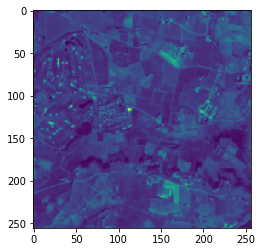

In [10]:
import matplotlib.pyplot as plt
plt.imshow(red_array)

In [0]:
def normalize(img):
  img = np.array(img, dtype=np.float64)
  img -= np.min(rgb)
  img /= np.max(img)
  return img

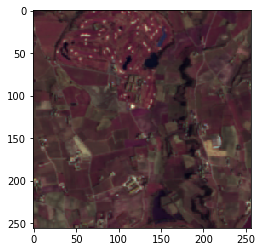

In [25]:
rgb_norm = normalize(rgb)
plt.imshow(rgb_norm)

In [35]:
np.max(rgb_norm[:,:,0])

1.0